# Naive Bayes and k-means clustering
(NEW CONTINUING)

This is the third notebook in the project

Here it is! The summit on the mountain, the cherry on the sundae, the machine learning on the data science project. This is for both anonymized and non-anonymized writing systems.

Contents

- Non-anonymized
    - [Model](#Non-anonymized)
    - [Clustering](#Clustering-on-confusion-matrix)
- Anonymized
    - [Model](#NB-with-anonymized-writing-system)
    - [Clustering](#Clustering)

In [1]:
import pickle
import pandas as pd
import numpy as np
from numpy import linalg
import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import wikipedia
from sklearn.cluster import KMeans

# Load dataset

In [2]:
f = open('data/chunks.pkl', 'rb')
data = pickle.load(f)
f.close()

In [3]:
data.head()

text lang
0  ıwlardı juzege asırıw ushın jirobankler qurıla...  kaa
1  eksas AQSHtin qublashigisinda Atlantika okeani...  kaa
2  asina shekem Kaspiy ham Aral tenizi boylarinan...  kaa
3  rigoriy kestesinde jıldın on birinshi ayı kunn...  kaa
4  andi Ol jili martta Дорогобуж rayoni ushin bol...  kaa

In [4]:
X = data['text']
y = data['lang']

# Non-anonymized
Based on https://towardsdatascience.com/an-efficient-language-detection-model-using-naive-bayes-85d02b51cfbd

Train time about 45 min
## Language identification

In [5]:
# set up model, vectorizer
cnt = CountVectorizer(analyzer = 'char',ngram_range=(2,2)) # bigrams
pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',MultinomialNB())
])

### Cross validation accuracy evaluation

In [6]:
# do cross validation
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
clf = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

In [7]:
clf

array([0.9054306 , 0.90592942, 0.90595268, 0.9061146 , 0.90598925])

### Predictions to be used in clustering

In [8]:
# get predictions for confusion matrix
y_pred = cross_val_predict(pipeline, X, y, cv=skf)

In [9]:
# make confusion matrix
labels = sorted(y.unique().tolist())
mat = confusion_matrix(y, y_pred, normalize='true', labels=labels)

In [10]:
mat

array([[0.99310777, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.83613244, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.9883    , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00180343, ..., 0.31145176, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.968     ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.61026103]])

In [11]:
# save matrix to be used in clusterfun
f = open('matrix_nonanonNBbis.pkl', 'wb')
pickle.dump(mat, f)
f.close()

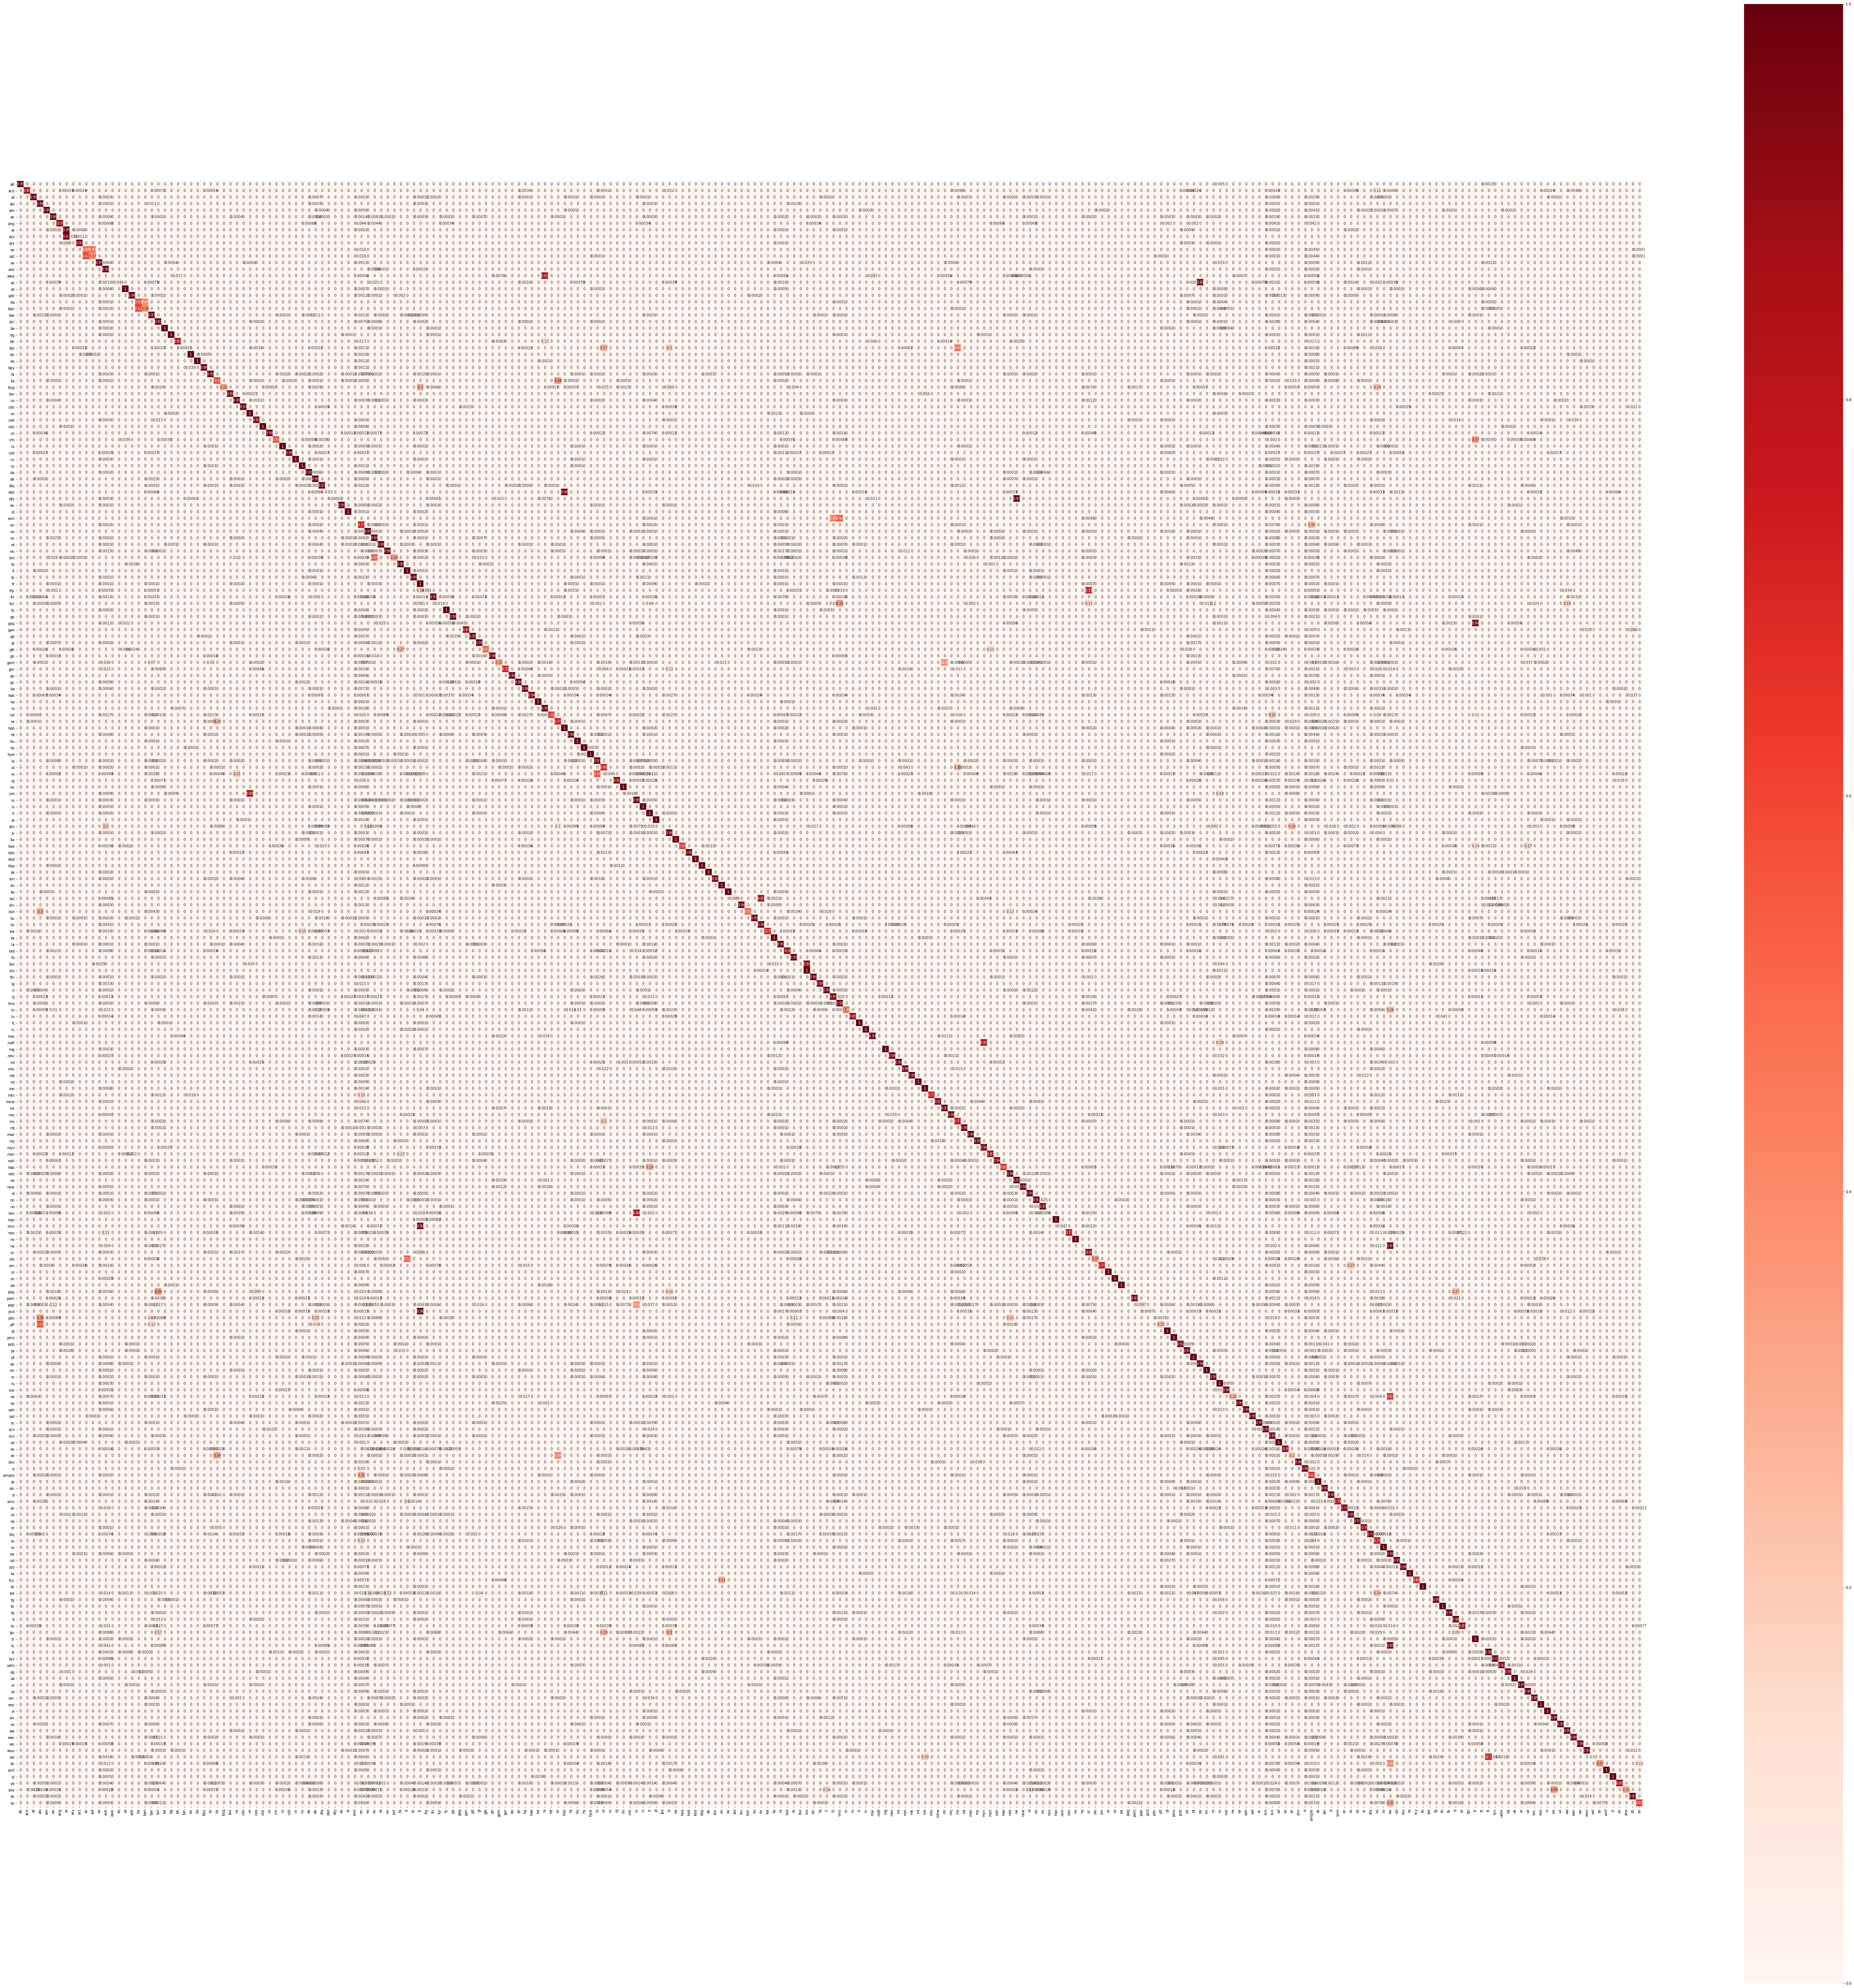

In [12]:
# make overall heatmap - others might not like this plot but I do lol
# it explains why I needed to do the clustering rather than manually interpret results
# from here
fig, ax = plt.subplots(figsize=(100,100))         
sns.heatmap(mat, square=True, annot=True, cmap="Reds",
           xticklabels=labels, yticklabels=labels, ax=ax)
plt.savefig('confusionNonanon.png')
plt.show()

# Relatedness mapping clustering
Based on what Daniel Zheng did here: https://github.com/Data-Science-for-Linguists/Document_Clustering/blob/master/clustering.ipynb

In [13]:
# make the clusters
from sklearn.cluster import KMeans
num_clusters = 150

km = KMeans(n_clusters=num_clusters)

%time km.fit(mat)

clusters = km.labels_.tolist()

CPU times: user 4.03 s, sys: 47.1 ms, total: 4.07 s
Wall time: 535 ms


In [14]:
# figure out which cluster each language was assigned to 
cluster_titles = dict()
for cluster, title in zip(clusters, labels):
    if cluster not in cluster_titles:
        cluster_titles[cluster] = []
    cluster_titles[cluster].append(wikipedia.languages()[title])

In [15]:
# show the clusters
for cluster, titles in cluster_titles.items():
    print(cluster, ':' , ', '.join(titles), '\n')

83 : Аҧсшәа 

1 : Acèh, Ænglisc, مصرى, авар, भोजपुरी, ᨅᨔ ᨕᨘᨁᨗ, буряад, qırımtatarca, Zazaki, Esperanto, euskara, furlan, 贛語, galego, گیلکی, गोंयची कोंकणी / Gõychi Konknni, Bahasa Hulontalo, 客家語/Hak-kâ-ngî, Fiji Hindi, Igbo, la .lojban., Qaraqalpaqsha, ភាសាខ្មែរ, kernowek, Ladino, Luganda, lingála, ລາວ, олык марий, Minangkabau, ꯃꯤꯇꯩ ꯂꯣꯟ, ဘာသာ မန်, मराठी, مازِرونی, Nāhuatl, Napulitano, norsk, Sesotho sa Leboa, Oromoo, Kapampangan, Papiamentu, پنجابی, português, русиньскый, Scots, davvisámegiella, anarâškielâ, chiShona, српски / srpski, Seeltersk, Sunda, ತುಳು, tetun, Setswana, удмурт, vèneto, Yorùbá, Zeêuws, 中文, isiZulu 

104 : Afrikaans 

13 : Alemannisch, Pälzisch 

128 : አማርኛ 

141 : aragonés 

25 : العربية, الدارجة 

21 : অসমীয়া, asturianu 

147 : Kotava 

5 : अवधी, हिन्दी 

102 : Aymar aru, Runa Simi 

113 : azərbaycanca 

134 : تۆرکجه 

36 : башҡортса, Basa Bali 

121 : Boarisch 

68 : Bikol Central, Cebuano, Jawa, Pangasinan, Tagalog, Tok Pisin 

53 : беларуская 

99 : български 


This is great! A few highlights:

- Swahili, Tsonga, Xhosa, Chewa, Kinyarwanda (Bantu)
- French, Norman, Picard (Oïl)
- Persian, Gilaki, Mazanderani (Western Iranian)
- Central Bikol, Cebuano, Javanese, Pangasinan, Tagalog (Malayo-Polynesian), Tok Pisin (English creole)
- Alemannic, Ripuarian, Pennsylvania German, Palatine German (High German)
- Romanian (Balkan Romance), Silesian (West Slavic), Kotava, Lojban (constructed)

Note that results may vary on subsequent runs. These are just from one run.

# NB with anonymized writing system
## Language identification

### Load dataset

In [16]:
f = open('data/chunks_shufanon.pkl', 'rb')
data = pickle.load(f)
f.close()

In [17]:
data['tokens'] = data['text'].map(lambda x: [bytes([elem]) for elem in list(x)])
data.head()

text lang  \
0  b'\x07\x15\x04\x01\x06\n\x07\x00\x16\x12\x17\x...  kaa   
1  b'\x05\x0e\x08\x01\x08\x00\x1a\x1f\x1c7\t\x02\...  kaa   
2  b"\x01\x08\x02\x03\x01\x00\x08\x13\x05\x0e\x05...  kaa   
3  b'\x06\x02\x10\x0b\x06\x02\r\x00\x0e\x05\x08\t...  kaa   
4  b'\x01\x03\n\x02\x00!\x04\x00\x16\x02\x04\x02\...  kaa   

                                              tokens  
0  [b'\x07', b'\x15', b'\x04', b'\x01', b'\x06', ...  
1  [b'\x05', b'\x0e', b'\x08', b'\x01', b'\x08', ...  
2  [b'\x01', b'\x08', b'\x02', b'\x03', b'\x01', ...  
3  [b'\x06', b'\x02', b'\x10', b'\x0b', b'\x06', ...  
4  [b'\x01', b'\x03', b'\n', b'\x02', b'\x00', b'...

In [18]:
X = data['tokens']
y = data['lang']

In [19]:
sum([len(s) for s in X]) / len(X)

499.98372801077244

### Cross validation accuracy evaluation

In [20]:
def dummy_fun(doc):
    return doc

In [21]:
def analyzer(chunk):
    n = 2 #gram size
    grams = []
    for i in range(len(chunk)-n+1):
        grams.append(b''.join(chunk[i:i+n]))
    return grams

In [22]:
# set up model, vectorizer
# FEATURES ARE CHARACTER BIGRAMS
cnt = CountVectorizer(analyzer=analyzer, tokenizer=dummy_fun, preprocessor=dummy_fun, 
                      token_pattern=None, max_features=20)# bigrams
pipeline = Pipeline([
   ('vectorizer',cnt),  
   ('model',MultinomialNB())
])

In [23]:
# do cross validation
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
clf = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy', n_jobs=1)
clf

array([0.8981024 , 0.89847847, 0.89853827, 0.89779657, 0.8978488 ])

Max features: Average accuracy <br>
10: 0.598 <br>
15: 0.814 <br>
20: 0.898 <br>
25: 0.928 <br>
30: 0.945 <br>
35: 0.955 <br>
40: 0.960 <br>
45: 0.962 <br>
500: 0.994 <br>
2000: 0.997 <br>
None: 0.999 <br>

### Predictions to be used in clustering

In [24]:
# get predictions for confusion matrix
y_pred = cross_val_predict(pipeline, X, y, cv=skf)
# make confusion matrix
labels = sorted(y.unique().tolist())
mat = confusion_matrix(y, y_pred, normalize='true', labels=labels)
mat

array([[8.92230576e-01, 3.75939850e-03, 9.39849624e-03, ...,
        1.25313283e-03, 0.00000000e+00, 0.00000000e+00],
       [4.79846449e-04, 8.57245681e-01, 0.00000000e+00, ...,
        0.00000000e+00, 2.39923225e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.68800000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.53832281e-01, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e-04, 6.00000000e-04, 3.96000000e-02, ...,
        0.00000000e+00, 6.85000000e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.63876388e-01]])

In [25]:
f = open('matrix_anonNBbis25.pkl', 'wb')
pickle.dump(mat, f)
f.close()

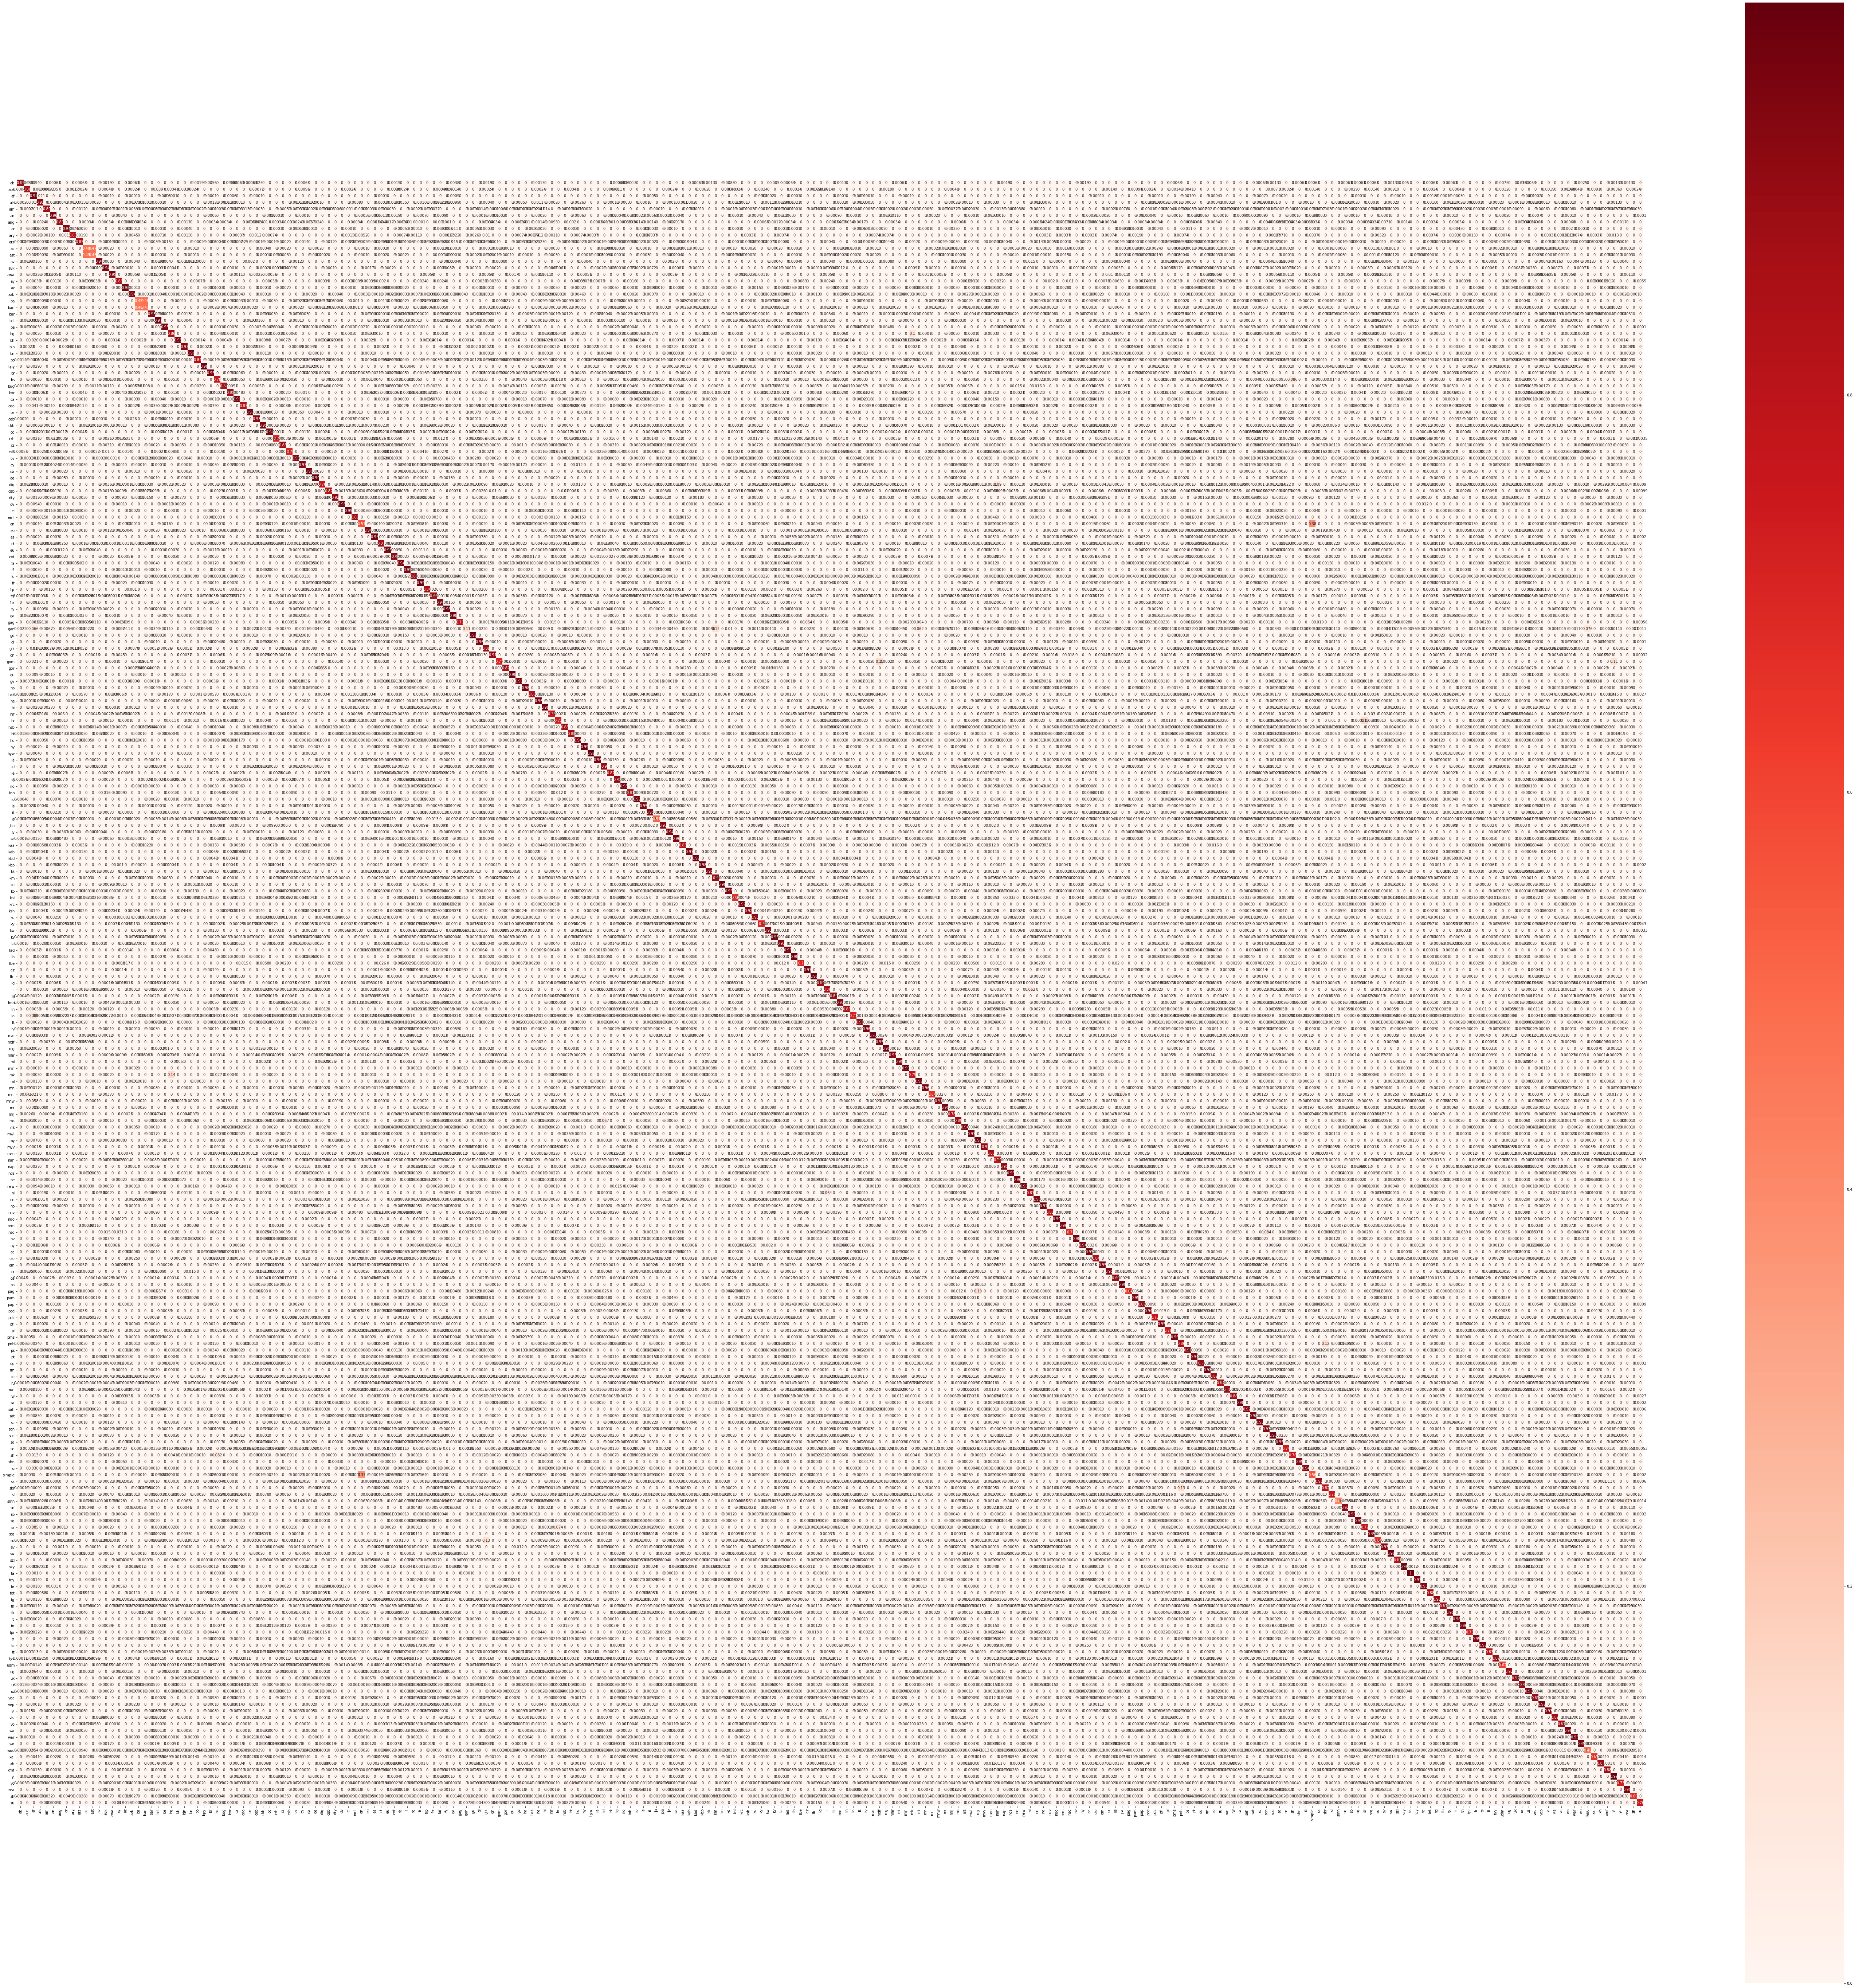

In [26]:
fig, ax = plt.subplots(figsize=(100,100))         
sns.heatmap(mat, square=True, annot=True, cmap="Reds",
           xticklabels=labels, yticklabels=labels, ax=ax)
plt.savefig('confusionAnon.png')
plt.show()

# Clustering

In [27]:
# make the clusters
num_clusters = 150

km = KMeans(n_clusters=num_clusters)

%time km.fit(mat)

clusters = km.labels_.tolist()

CPU times: user 4.11 s, sys: 36.4 ms, total: 4.15 s
Wall time: 524 ms


In [28]:
# figure out which cluster each language was assigned to 
cluster_titles = dict()
for cluster, title in zip(clusters, labels):
    if cluster not in cluster_titles:
        cluster_titles[cluster] = []
    cluster_titles[cluster].append(wikipedia.languages()[title])

In [29]:
# show the clusters
for cluster, titles in cluster_titles.items():
    print(cluster, ':' , ', '.join(titles), '\n')

6 : Аҧсшәа, Acèh, Afrikaans, አማርኛ, Ænglisc, الدارجة, مصرى, Aymar aru, български, བོད་ཡིག, bosanski, ᨅᨔ ᨕᨘᨁᨗ, Mìng-dĕ̤ng-ngṳ̄, qırımtatarca, čeština, kaszëbsczi, Zazaki, dolnoserbski, eesti, føroyskt, arpetan, Nordfriisk, Gagauz, 贛語, Avañe'ẽ, गोंयची कोंकणी / Gõychi Konknni, Bahasa Hulontalo, 客家語/Hak-kâ-ngî, Fiji Hindi, hrvatski, hornjoserbsce, Kreyòl ayisyen, Bahasa Indonesia, Interlingue, ГӀалгӀай, 日本語, Qaraqalpaqsha, ភាសាខ្មែរ, перем коми, коми, лакку, Limburgs, Ligure, lingála, ລາວ, македонски, ꯃꯤꯇꯩ ꯂꯣꯟ, ဘာသာ မန်, кырык мары, эрзянь, مازِرونی, Nāhuatl, Nederlands, Novial, Sesotho sa Leboa, livvinkarjala, Ирон, Pangasinan, Papiamentu, Deitsch, polski, پنجابی, Runa Simi, română, русский, Kinyarwanda, саха тыла, davvisámegiella, srpskohrvatski / српскохрватски, සිංහල, slovenčina, سرائیکی, slovenščina, anarâškielâ, српски / srpski, Sunda, ślůnski, tetun, ไทย, Tok Pisin, татарча/tatarça, тыва дыл, удмурт, ئۇيغۇرچە / Uyghurche, اردو, vèneto, Tiếng Việt, West-Vlams, Volapük, 吴语, хальмг, isi

You can see these clusters for the anonymized dataset aren't too informative. There's one group that's an "other" category and nearly all the others are just single languages on their own. Trying again with k=50:

In [30]:
# make the clusters
num_clusters = 50
km = KMeans(n_clusters=num_clusters)
%time km.fit(mat)
clusters = km.labels_.tolist()
# figure out which cluster each language was assigned to 
cluster_titles = dict()
for cluster, title in zip(clusters, labels):
    if cluster not in cluster_titles:
        cluster_titles[cluster] = []
    cluster_titles[cluster].append(wikipedia.languages()[title])
# show the clusters
for cluster, titles in cluster_titles.items():
    print(cluster, ':' , ', '.join(titles), '\n')

CPU times: user 1.32 s, sys: 10.7 ms, total: 1.33 s
Wall time: 169 ms
3 : Аҧсшәа, Acèh, Afrikaans, Alemannisch, አማርኛ, aragonés, Ænglisc, العربية, الدارجة, مصرى, অসমীয়া, asturianu, Kotava, Aymar aru, azərbaycanca, تۆرکجه, башҡортса, Basa Bali, Boarisch, беларуская, български, भोजपुरी, Banjar, বাংলা, བོད་ཡིག, brezhoneg, bosanski, ᨅᨔ ᨕᨘᨁᨗ, буряад, Mìng-dĕ̤ng-ngṳ̄, Cebuano, کوردی, corsu, qırımtatarca, čeština, kaszëbsczi, Чӑвашла, Cymraeg, Zazaki, dolnoserbski, डोटेली, ދިވެހިބަސް, Ελληνικά, emiliàn e rumagnòl, English, Esperanto, eesti, euskara, estremeñu, فارسی, suomi, føroyskt, arpetan, Nordfriisk, furlan, Gagauz, 贛語, galego, گیلکی, गोंयची कोंकणी / Gõychi Konknni, Bahasa Hulontalo, Hausa, 客家語/Hak-kâ-ngî, हिन्दी, Fiji Hindi, hrvatski, hornjoserbsce, Kreyòl ayisyen, magyar, հայերեն, interlingua, Bahasa Indonesia, Interlingue, Igbo, Ilokano, ГӀалгӀай, Ido, íslenska, 日本語, ქართული, Qaraqalpaqsha, Taqbaylit, Адыгэбзэ, қазақша, ភាសាខ្មែរ, 한국어, перем коми, Ripoarisch, kurdî, коми, kernowek, Lat

This doesn't look much better either.